**Exploratory Data Analysis (EDA) Setup**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**Loading and Preparing Data**

In [2]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

**Preview of Training Data First 5 cols**

In [3]:
print("Train Data Shape : ", train.shape)
train.head()

Train Data Shape :  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


**Preview of Test Data First 5 cols**

In [4]:
print("Test Data Shape : ", test.shape)
test.head()

Test Data Shape :  (3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


**Train and Test Data Information**


In [5]:
print("Train Data Info : \n")
print(train.info())

print("\nTest Data Info : \n")
print(test.info())

Train Data Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Test Data Info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


**Heatmap of Missing Values in Train and Test Data**

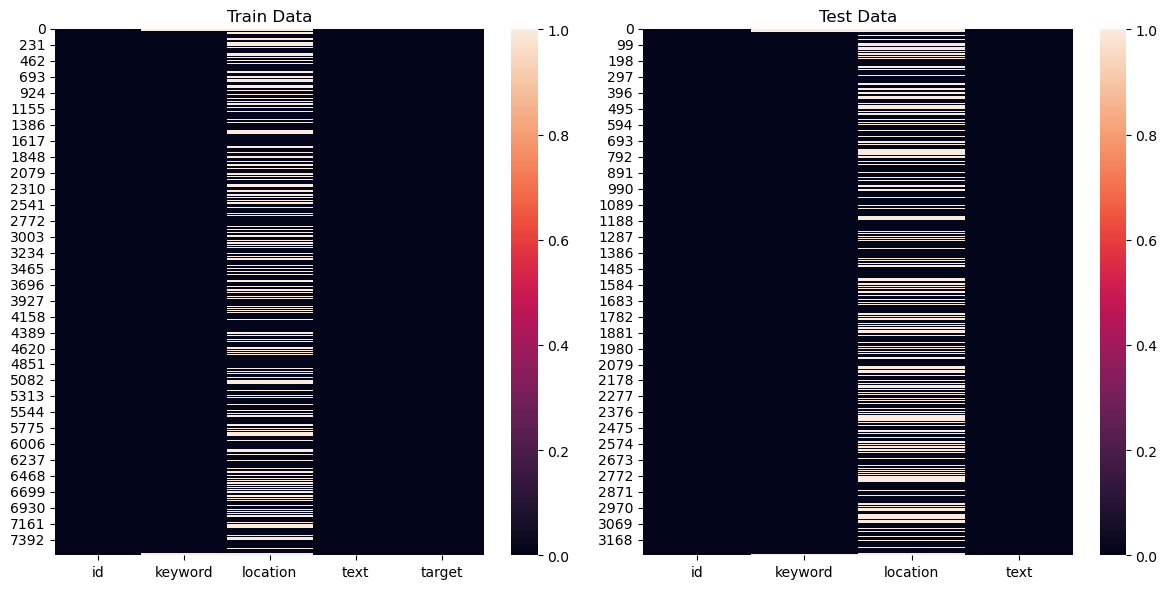

In [6]:
# Create subplots for both train and test data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot heatmap for train data
sns.heatmap(train.isna(), ax=axes[0])
axes[0].set_title('Train Data')

# Plot heatmap for test data
sns.heatmap(test.isna(), ax=axes[1])
axes[1].set_title('Test Data')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


**Count of Missing Values in Train and Test Data**

In [7]:
print("Count of Missing Values in Training Data : ")
print(train.isna().sum())
print("\nCount of Missing Values in Test Data : ")
print(test.isna().sum())

Count of Missing Values in Training Data : 
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Count of Missing Values in Test Data : 
id             0
keyword       26
location    1105
text           0
dtype: int64


**Handling Missing Values with SimpleImputer**


In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
train['keyword'] = imputer.fit_transform(train['keyword'].values.reshape(-1, 1)).flatten()
train['location'] = imputer.fit_transform(train['location'].values.reshape(-1, 1)).flatten()

test['keyword'] = imputer.fit_transform(test['keyword'].values.reshape(-1, 1)).flatten()
test['location'] = imputer.fit_transform(test['location'].values.reshape(-1, 1)).flatten()

print("Count of Missing Values After SimpleImputer in Training Data : ")
print(train.isna().sum())
print("\nCount of Missing Values After SimpleImputer in Test Data : ")
print(test.isna().sum())

Count of Missing Values After SimpleImputer in Training Data : 
id          0
keyword     0
location    0
text        0
target      0
dtype: int64

Count of Missing Values After SimpleImputer in Test Data : 
id          0
keyword     0
location    0
text        0
dtype: int64


**Target Distribution and Count in Training Set**

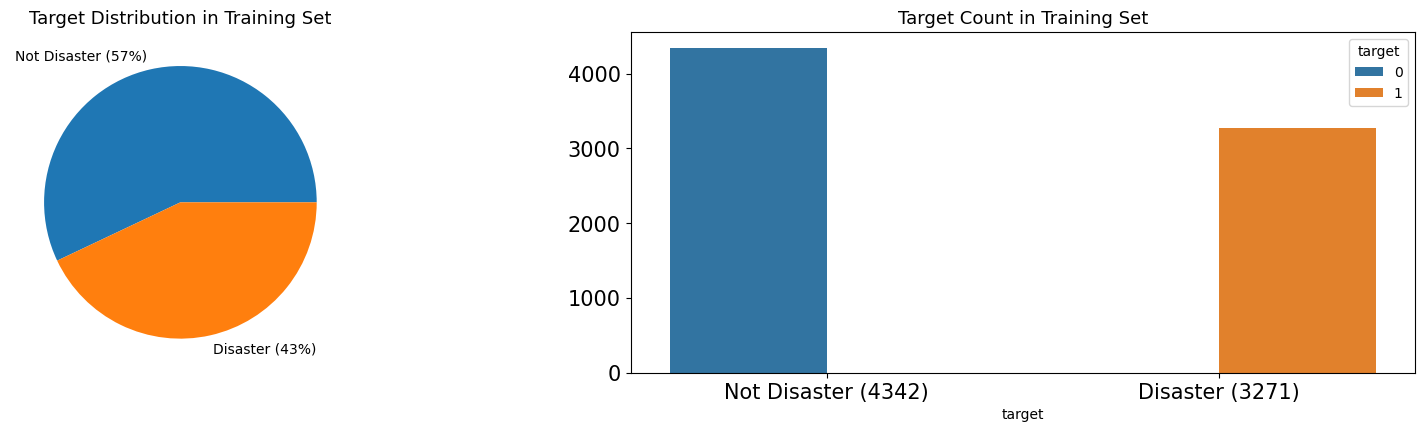

In [9]:

# Create subplots with 2 columns and set the figure size and DPI
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

# Adjust the spacing between subplots
plt.tight_layout()

# Plot a pie chart to show the distribution of the target variable in the training dataset
train.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'])

# Plot a countplot to show the count of each target class in the training dataset
sns.countplot(x=train['target'], hue=train['target'], ax=axes[1])

# Remove the y-labels for both subplots
axes[0].set_ylabel('')
axes[1].set_ylabel('')

# Set custom x-axis labels for the countplot
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])

# Set the font size of tick labels on both x and y axes for both subplots
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

# Set the titles for both subplots
axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

# Display the plot
plt.show()


**TF-IDF Vectorization of Training Data (Per Column)**


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = train['text']
y = train['target']

X = X.str.lower()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)



**Train-Test Split**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

**Import Classification Models**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

**Initializing Classification Models**

- LR: Logistic Regression model
- MNB: Multinomial Naive Bayes model
- DT: Decision Tree Classifier model
- svc: Support Vector Machine model
- rfc: Random Forest Classifier model

**Models Training**

In [13]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

**Models Evaluation with F1 Score**

Submissions are evaluated using F1 between the predicted and expected answers.

In [14]:
from sklearn.metrics import f1_score

nb_pred = nb_model.predict(X_test)
print(f"Multinomial Naive Bayes F1 Score: {f1_score(y_test, nb_pred):.3f}")

lr_pred = lr_model.predict(X_test)
print(f"Logistic Regression F1 Score: {f1_score(y_test, lr_pred):.3f}")

xgb_pred = xgb_model.predict(X_test)
print(f"XGBoost F1 Score: {f1_score(y_test, xgb_pred):.3f}")

dt_pred = dt_model.predict(X_test)
print(f"Decision Tree F1 Score: {f1_score(y_test, dt_pred):.3f}")

svm_pred = svm_model.predict(X_test)
print(f"Support Vector Machine F1 Score: {f1_score(y_test, svm_pred):.3f}")

rf_pred = rf_model.predict(X_test)
print(f"Random Forest F1 Score: {f1_score(y_test, rf_pred):.3f}")


Multinomial Naive Bayes F1 Score: 0.706
Logistic Regression F1 Score: 0.729
XGBoost F1 Score: 0.719
Decision Tree F1 Score: 0.626
Support Vector Machine F1 Score: 0.731
Random Forest F1 Score: 0.676


**Train The Best Model On All Data**

In [15]:
svm_model = SVC()
svm_model.fit(X, y)

SVC()

**Predictions on Test Data and Saving to CSV**

1. Lowercase the text in the 'text' column of the test dataset.
2. Extract X for the test data using the trained TF-IDF vectorizer.
3. Generate predictions for the test data using trained model.
4. Create separate DataFrames to store the predictions for each model.
5. Save the predictions to CSV file: 'svc_predictions.csv'.

Make sure to adjust the file name and path in the `to_csv()` function call according to your preference.

In [16]:
test_reviews = test['text'].str.lower()

test_X = vectorizer.transform(test_reviews)

svm_pred_test = svm_model.predict(test_X)


svm_predictions_df = pd.DataFrame({'id': test['id'], 'target': svm_pred_test})

svm_predictions_df.to_csv('submission.csv', index=False)

**Save Trained Model and Vectorizer**

In [17]:
 import joblib

joblib.dump(svm_model, "svm_model_Sentiment.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']